<a href="https://colab.research.google.com/github/Aradhya2006/EDA_project/blob/main/EDA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:


# Set plotting style
plt.style.use("ggplot")
sns.set()

# Define date range
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download Titan stock data
titan = yf.download("TITAN.NS", start=start_date, end=end_date)

#  Preview data
print("Data Preview:")
print(titan.head())
print("\nSummary Statistics:")
print(titan.describe())



/tmp/ipython-input-1191893731.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  titan = yf.download("TITAN.NS", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data Preview:
Price             Close         High          Low         Open   Volume
Ticker         TITAN.NS     TITAN.NS     TITAN.NS     TITAN.NS TITAN.NS
Date                                                                   
2020-01-01  1132.704834  1176.110064  1130.203468  1171.646879  3137636
2020-01-02  1133.538574  1137.756531  1118.236416  1134.911871  3286436
2020-01-03  1117.942017  1133.930882  1110.389065  1133.930882  2695237
2020-01-06  1136.481323  1149.037008  1128.143595  1139.816438  4494752
2020-01-07  1137.805542  1151.440203  1130.056455  1148.595543  2363578

Summary Statistics:
Price         Close         High          Low         Open        Volume
Ticker     TITAN.NS     TITAN.NS     TITAN.NS     TITAN.NS      TITAN.NS
count   1238.000000  1238.000000  1238.000000  1238.000000  1.238000e+03
mean    2339.730519  2366.398326  2313.323733  2341.618594  1.713509e+06
std      872.985728   879.431004   866.916926   874.230424  1.427264e+06
min      785.659119   82

3. Dataset Overview

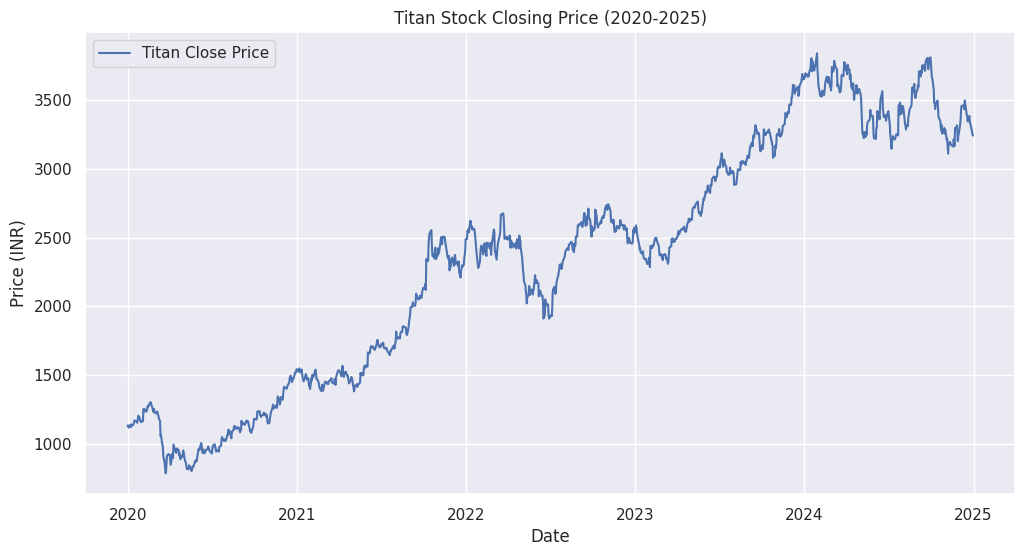

In [26]:
# Plot Closing Price
plt.figure(figsize=(12, 6))
plt.plot(titan['Close'], label='Titan Close Price')
plt.title("Titan Stock Closing Price (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.show()



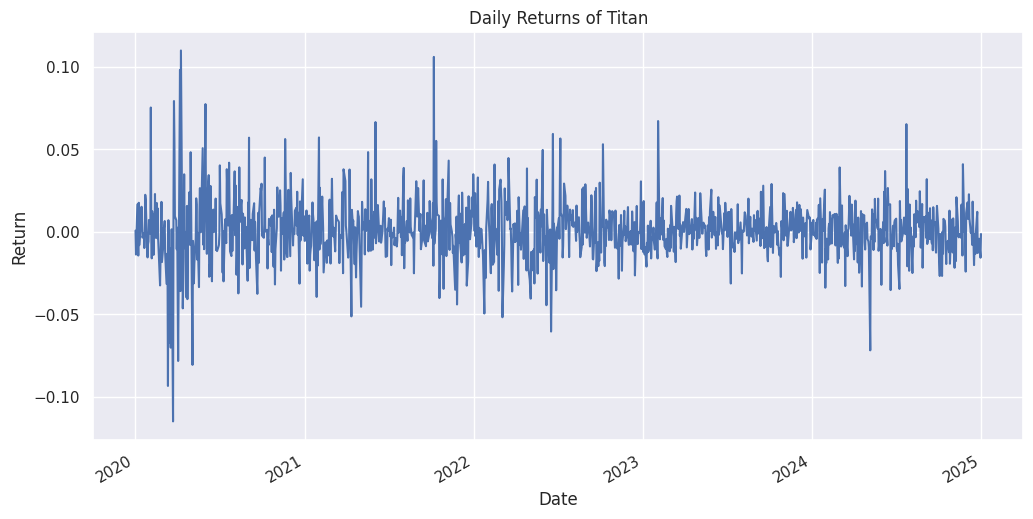

In [27]:
# Calculate daily returns
titan['Daily Return'] = titan['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(12, 6))
titan['Daily Return'].plot(kind='line')
plt.title("Daily Returns of Titan")
plt.ylabel("Return")
plt.xlabel("Date")
plt.show()


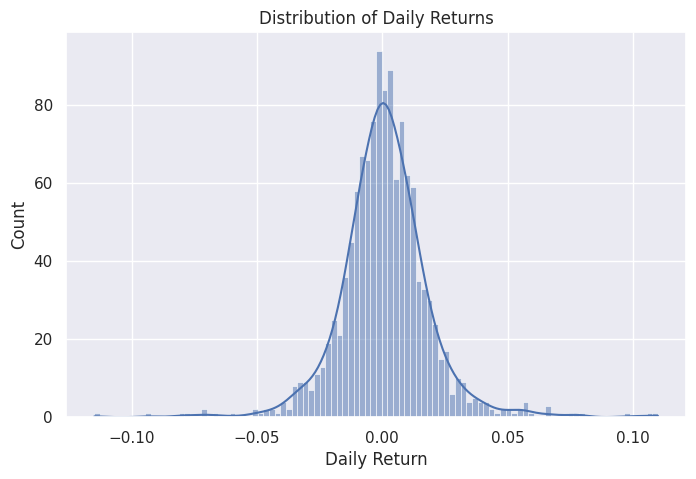

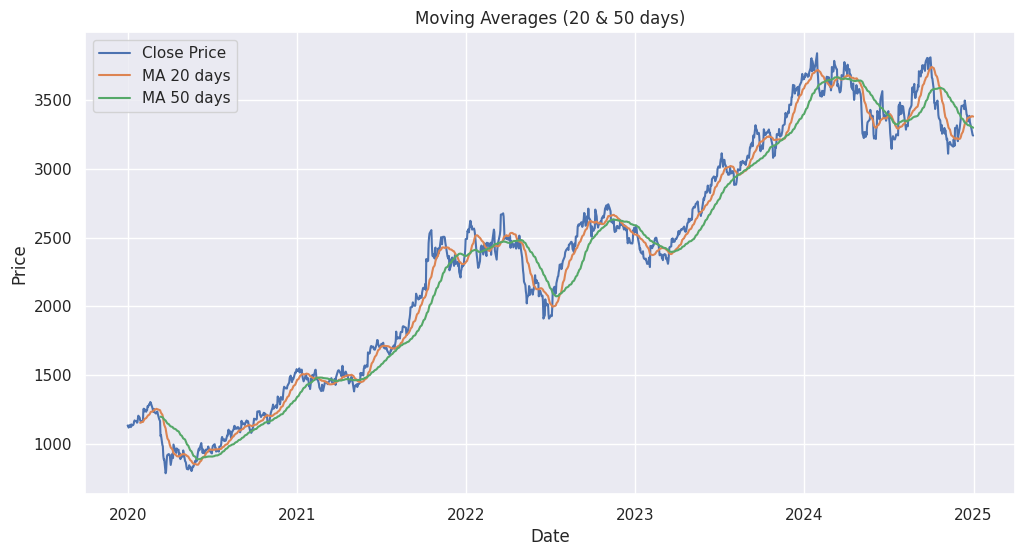

In [28]:

# Plot distribution of daily returns
plt.figure(figsize=(8, 5))
sns.histplot(titan['Daily Return'].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

#  Moving Averages
titan['MA20'] = titan['Close'].rolling(window=20).mean()
titan['MA50'] = titan['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(titan['Close'], label='Close Price')
plt.plot(titan['MA20'], label='MA 20 days')
plt.plot(titan['MA50'], label='MA 50 days')
plt.title("Moving Averages (20 & 50 days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()




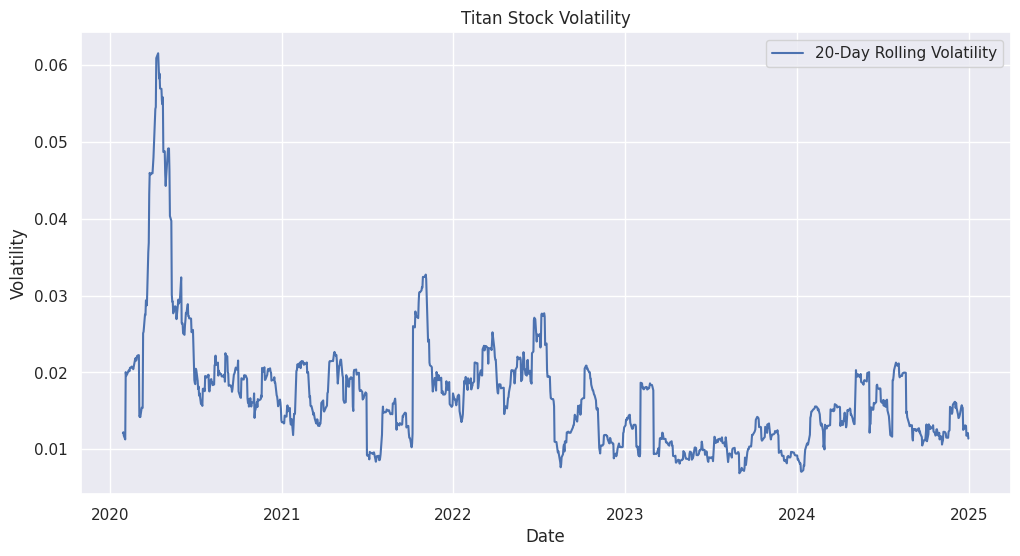

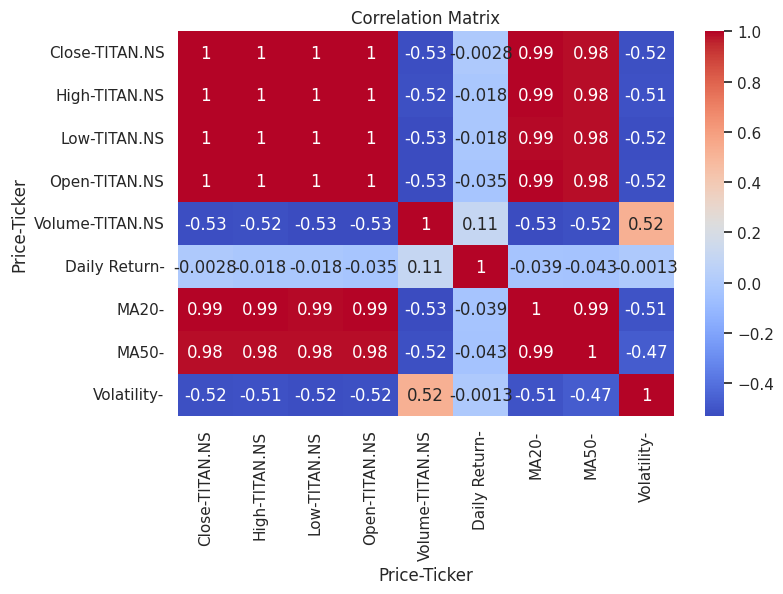

In [29]:
#  Volatility (Rolling Std Dev)
titan['Volatility'] = titan['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(titan['Volatility'], label='20-Day Rolling Volatility')
plt.title("Titan Stock Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(titan.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
